In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("World Happiness.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Visualization

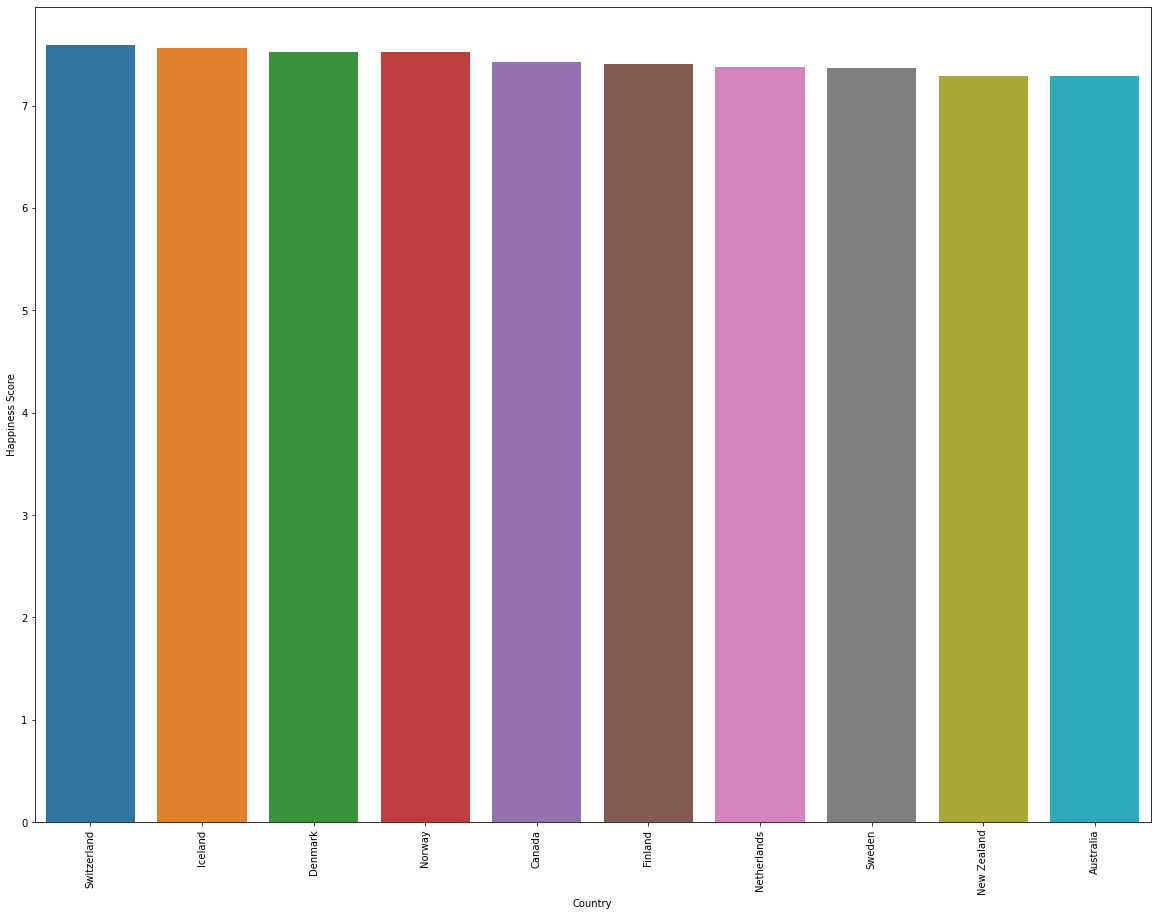

In [16]:
plt.figure(figsize=(20,15))
g1=sns.barplot(x='Country',y='Happiness Score',data=df.sort_values(by='Happiness Score',ascending=False).head(10))
plt.setp(g1.get_xticklabels(), rotation=90)
plt.show()

In [17]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

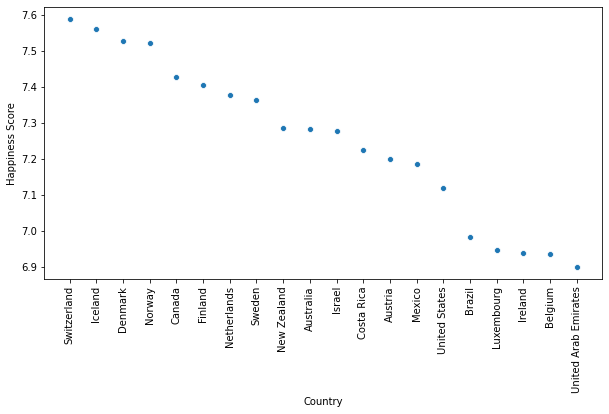

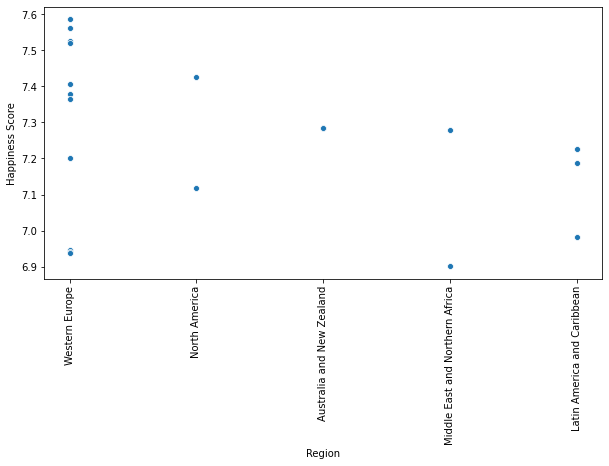

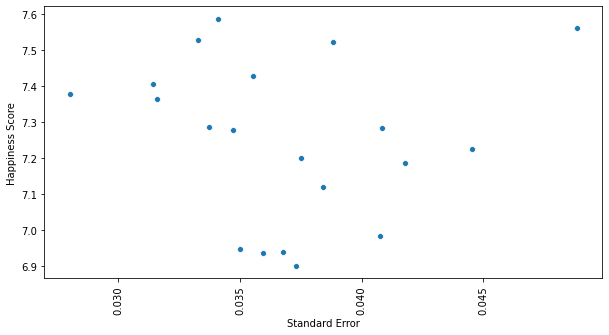

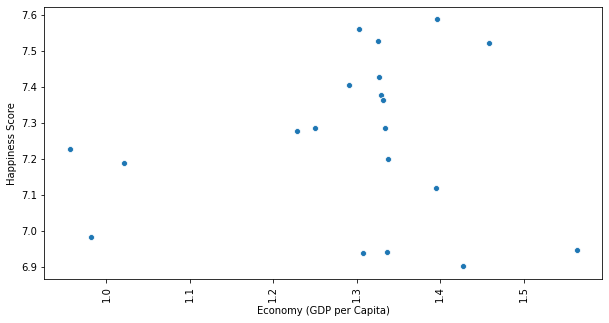

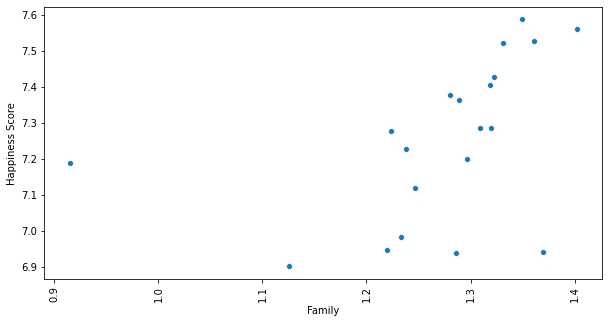

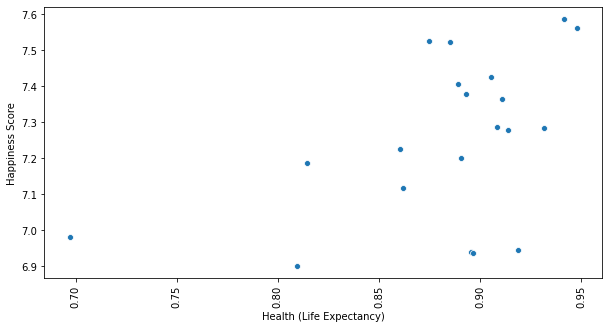

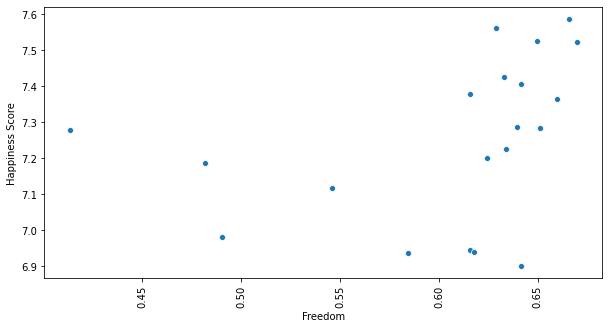

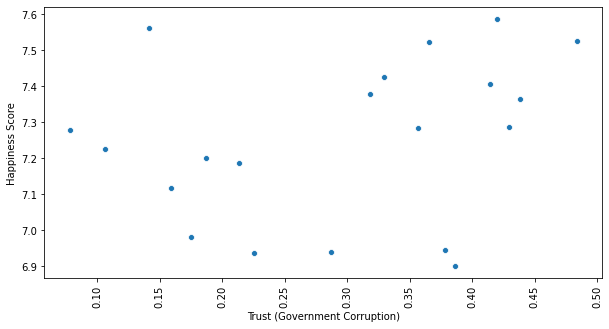

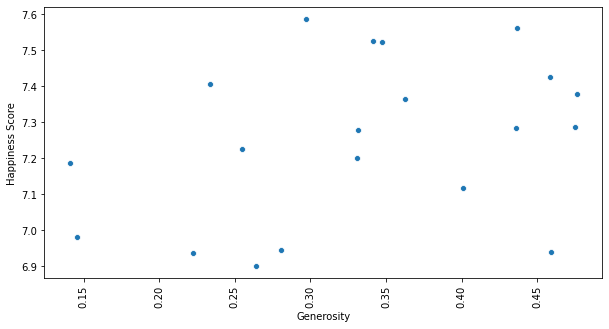

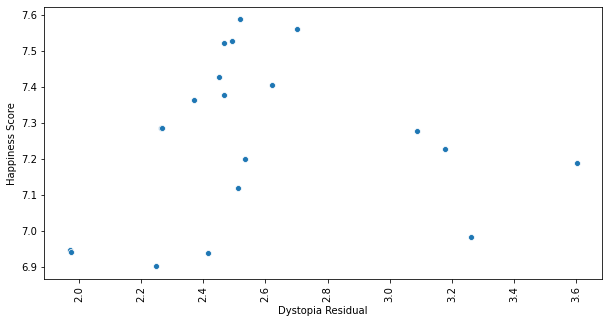

In [27]:
a=['Country', 'Region',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
for i in a:
    plt.figure(figsize=(10,5))
    g=sns.scatterplot(x=i,y="Happiness Score",data=df.sort_values(by='Happiness Score',ascending=False).head(20))
    plt.setp(g.get_xticklabels(), rotation=90)
    plt.show()

From the above insights Western Europe has high Happiness Score,
when Economy (GDP per capita), Health (Life Expectancy),freedom,Generosity is high, Happiness Score also high,
When Dystopia is low, Happiness Score is high.

In [30]:
df=df[['Country', 'Region', 'Happiness Rank',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Happiness Score']]

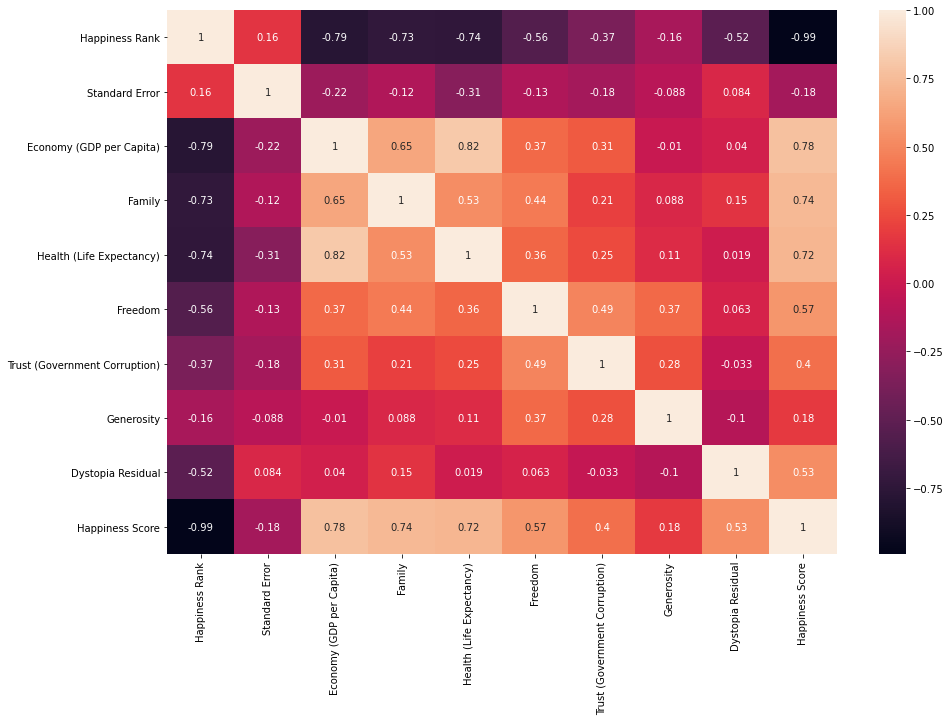

In [31]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [37]:
df1=df.drop(["Country","Region","Happiness Rank"],axis=1)

# Removing Outliers

In [38]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
threshold=3
new_df=df1[(z<3).all(axis=1)]

In [39]:
new_df.shape

(149, 9)

In [41]:
df1.shape

(158, 9)

In [43]:
new_df.skew()

Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
Happiness Score                  0.169740
dtype: float64

In [46]:
X=new_df.drop(['Happiness Score'],axis=1)
Y=new_df['Happiness Score']

In [53]:
X.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Models

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(X)

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f"best accuracy : {accu*100} found on the random state {best_rstate}")

best accuracy : 99.99999658215386 found on the random state 623


In [49]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=623)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor

models=[RandomForestRegressor(),LinearRegression(),AdaBoostRegressor(),SGDRegressor()]

for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    m.score(x_train,y_train)
    print("score of ",m,'is')
    r2score=r2_score(y_test,predm)
    cvscore=cross_val_score(m,x_train,y_train,cv=5).mean()
    print(f"Accuracy is {r2score*100},cross_val_score={cvscore*100} & differrence is {(r2score*100)-(cvscore*100)}")
    print('\n')

score of  RandomForestRegressor() is
Accuracy is 96.31986736067361,cross_val_score=85.45389613546315 & differrence is 10.865971225210458


score of  LinearRegression() is
Accuracy is 99.99999658215386,cross_val_score=99.99998886086209 & differrence is 7.721291765960814e-06


score of  AdaBoostRegressor() is
Accuracy is 93.3695794143398,cross_val_score=81.96970329413314 & differrence is 11.399876120206656


score of  SGDRegressor() is
Accuracy is 99.7581676433545,cross_val_score=98.57434111908373 & differrence is 1.1838265242707706




In [51]:
parameters={"max_iter":[500,700,900,1100,1200,1300,1400,1500],
           "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
           "penalty":["elasticnet","11","12"]}
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }
parameters_2= {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
param_grid_SGD = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }
params= {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
score = make_scorer(mean_squared_error)

GCV=GridSearchCV(SGDRegressor(),param_grid_SGD,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_Pred=GCV.best_estimator_.predict(x_test)
mse = mean_squared_error(y_test, GCV_Pred)
print("MSE: %.2f" % mse)
print("final accuracy : ",r2_score(y_test,GCV_Pred)*100)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before conv

MSE: 0.00
final accuracy :  99.99182345310504


SGD Regressor is best model.